In [41]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [1]:
fish_length = [ 25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
               700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
               925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0,
               9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
np.column_stack(([1,2,3], [4,5,6]))


array([[1, 4],
       [2, 5],
       [3, 6]])

In [21]:
print(np.ones((2,3)))
print(np.zeros(5))
print(np.full((2,3),15))

[[1. 1. 1.]
 [1. 1. 1.]]
[0. 0. 0. 0. 0.]
[[15 15 15]
 [15 15 15]]


In [16]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[0:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [18]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [42]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [45]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

print(kn.predict([[25, 150]]))#150에 25인 도미인경우인데..
#0이라고 나오면 빙어라고 나옴

[0.]


In [44]:
distances, indexes = kn.kneighbors([[25, 150]])
print(distances, indexes)
#

[[ 92.00086956 130.48375378 130.73859415 137.17988191 138.32150953]] [[ 0 48 47 45 46]]


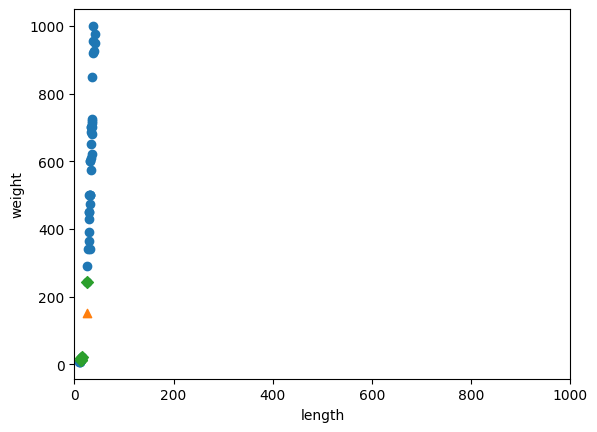

In [46]:
plt.scatter(fish_data[:,0], fish_data[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(fish_data[indexes,0], fish_data[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#표준점수로 바꾸기

In [48]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)


[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [57]:
train_scaled = (train_input - mean) / std
print(train_input)
print(train_scaled)

[[  29.7  500. ]
 [  12.2   12.2]
 [  33.   700. ]
 [  11.3    8.7]
 [  39.5  925. ]
 [  29.   430. ]
 [  36.   714. ]
 [  36.   850. ]
 [  31.   475. ]
 [  35.   720. ]
 [  37.  1000. ]
 [  11.2    9.8]
 [  34.5  620. ]
 [  12.     9.8]
 [  29.   363. ]
 [  33.   700. ]
 [  30.7  500. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  14.3   19.7]
 [  31.5  500. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  32.   600. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  10.6    7. ]
 [  35.   700. ]
 [  32.   600. ]
 [  35.   725. ]
 [  13.    12.2]
 [  30.   450. ]
 [  32.   340. ]
 [  15.    19.9]
 [  30.   390. ]
 [  41.   975. ]]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.1705

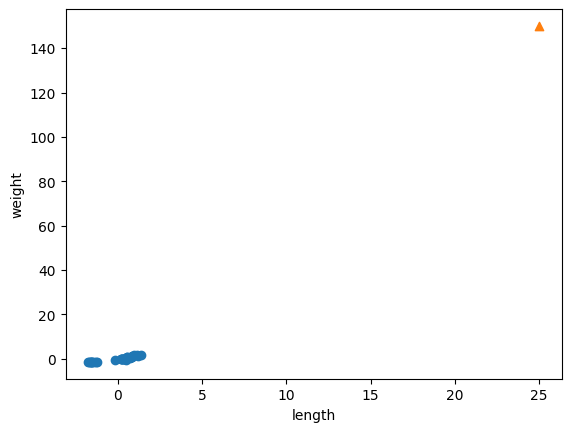

In [53]:

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

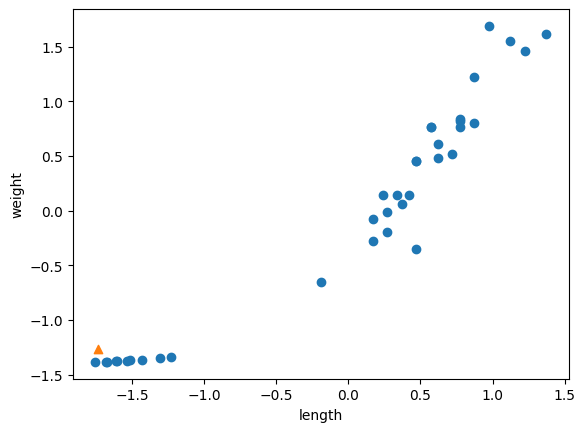

In [63]:
new = ([10, 44] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [58]:
kn.fit(train_scaled, train_target)


KNeighborsClassifier()

In [60]:
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)


1.0

In [61]:
print(kn.predict([new]))


[1.]


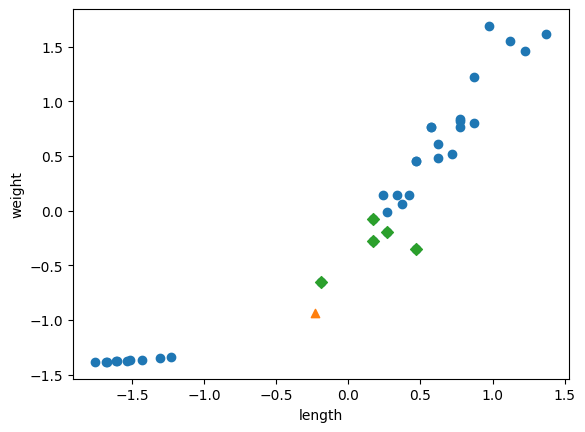

In [62]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()